In [16]:
import pandas as pd
import torch

# Load the file path
file_path = r"C:\Users\phan635\Downloads\outputs.xls"

# Try reading the file as a TSV (tab-separated values) file
data = pd.read_csv(file_path, sep='\t', header=None)

# Convert the pandas DataFrame to a PyTorch tensor
tensor_data = torch.tensor(data.values, dtype=torch.float32)
# Display the tensor data
print('tensor_data.shape',tensor_data.shape)
train_num = int(tensor_data.shape[0]*0.8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset = {}
train_input = tensor_data[:train_num,:3]
train_label = tensor_data[:train_num,3]
test_input = tensor_data[train_num:,:3]
test_label = tensor_data[train_num:,3]
dataset = {'train_input': train_input, 'train_label': train_label, 'test_input': test_input, 'test_label': test_label}

print("dataset['train_input'].shape",dataset['train_input'].shape)

tensor_data.shape torch.Size([3375, 4])
dataset['train_input'].shape torch.Size([2700, 3])


In [17]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[3,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

train loss: 9.24e-01 | test loss: 1.39e+00 | reg: 1.64e+01 : 100%|██| 20/20 [00:13<00:00,  1.45it/s]


{'train_loss': [array(0.92293113, dtype=float32),
  array(0.9225354, dtype=float32),
  array(0.9224335, dtype=float32),
  array(0.9223662, dtype=float32),
  array(0.92231536, dtype=float32),
  array(0.9223123, dtype=float32),
  array(0.9222459, dtype=float32),
  array(0.9221949, dtype=float32),
  array(0.9221546, dtype=float32),
  array(0.9221676, dtype=float32),
  array(0.92212296, dtype=float32),
  array(0.92213625, dtype=float32),
  array(0.9221458, dtype=float32),
  array(0.922157, dtype=float32),
  array(0.9221616, dtype=float32),
  array(0.9268601, dtype=float32),
  array(0.92637205, dtype=float32),
  array(0.92595136, dtype=float32),
  array(0.9251923, dtype=float32),
  array(0.9242532, dtype=float32)],
 'test_loss': [array(1.3354836, dtype=float32),
  array(1.3173351, dtype=float32),
  array(1.3459601, dtype=float32),
  array(1.3492129, dtype=float32),
  array(1.3415684, dtype=float32),
  array(1.2169588, dtype=float32),
  array(1.2299209, dtype=float32),
  array(1.2461169, dty

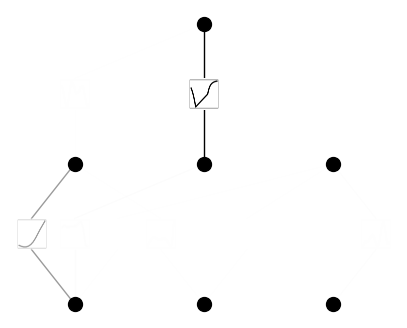

In [19]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [20]:
model.auto_symbolic()

fixing (0,0,0) with sin, r2=0.9984709024429321
fixing (0,0,1) with gaussian, r2=0.9536946415901184
fixing (0,0,2) with tan, r2=0.8223929405212402
fixing (0,1,0) with 1/x, r2=0.8363654613494873
fixing (0,1,1) with arctan, r2=0.7535078525543213
fixing (0,1,2) with tan, r2=0.858582615852356
fixing (0,2,0) with gaussian, r2=0.851507842540741
fixing (0,2,1) with abs, r2=0.8036632537841797
fixing (0,2,2) with gaussian, r2=0.8007346391677856
fixing (1,0,0) with tan, r2=0.7404935359954834
fixing (1,1,0) with 1/x^2, r2=0.9775971174240112
fixing (1,2,0) with sgn, r2=0.6044548749923706


In [22]:
formula, variables = model.symbolic_formula()
formula[0]

-0.29 - 0.e-2/(0.03*atan(5.66*x_2 + 6.72) - 0.52 + exp(-23.04*(0.61 - x_1)**2))**2